In [10]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('data.csv')
data.head()
#Vital statistics:
print("Data type: ", type(data))
print("Dimension: ", data.shape)
#Information:
data.info()

Data type:  <class 'pandas.core.frame.DataFrame'>
Dimension:  (2129, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   b            2126 non-null   float64
 1   e            2126 non-null   float64
 2   AC           2126 non-null   float64
 3   FM           2127 non-null   float64
 4   UC           2127 non-null   float64
 5   DL           2128 non-null   float64
 6   DS           2128 non-null   float64
 7   DP           2128 non-null   float64
 8   DR           2128 non-null   float64
 9   Unnamed: 9   0 non-null      float64
 10  LB           2126 non-null   float64
 11  AC.1         2126 non-null   float64
 12  FM.1         2127 non-null   float64
 13  UC.1         2127 non-null   float64
 14  DL.1         2128 non-null   float64
 15  DS.1         2128 non-null   float64
 16  DP.1         2128 non-null   float64
 17  ASTV         2127

In [12]:
data.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


## EXPLORATORY DATA ANALYSIS ##

**We look at the description of parameters:**\
LB - FHR baseline (beats per minute)\
AC - # of accelerations per second\
FM - # of fetal movements per second\
UC - # of uterine contractions per second\
DL - # of light decelerations per second\
DS - # of severe decelerations per second\
DP - # of prolongued decelerations per second\
ASTV - percentage of time with abnormal short term variability\
MSTV - mean value of short term variability\
ALTV - percentage of time with abnormal long term variability\
MLTV - mean value of long term variability\
Width - width of FHR histogram\
Min - minimum of FHR histogram\
Max - Maximum of FHR histogram\
Nmax - # of histogram peaks\
Nzeros - # of histogram zeros\
Mode - histogram mode\
Mean - histogram mean\
Median - histogram median\
Variance - histogram variance\
Tendency - histogram tendency\
CLASS - FHR pattern class code (1 to 10) \
NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

Campos, D. & Bernardes, J. (2000). Cardiotocography [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51S4N.

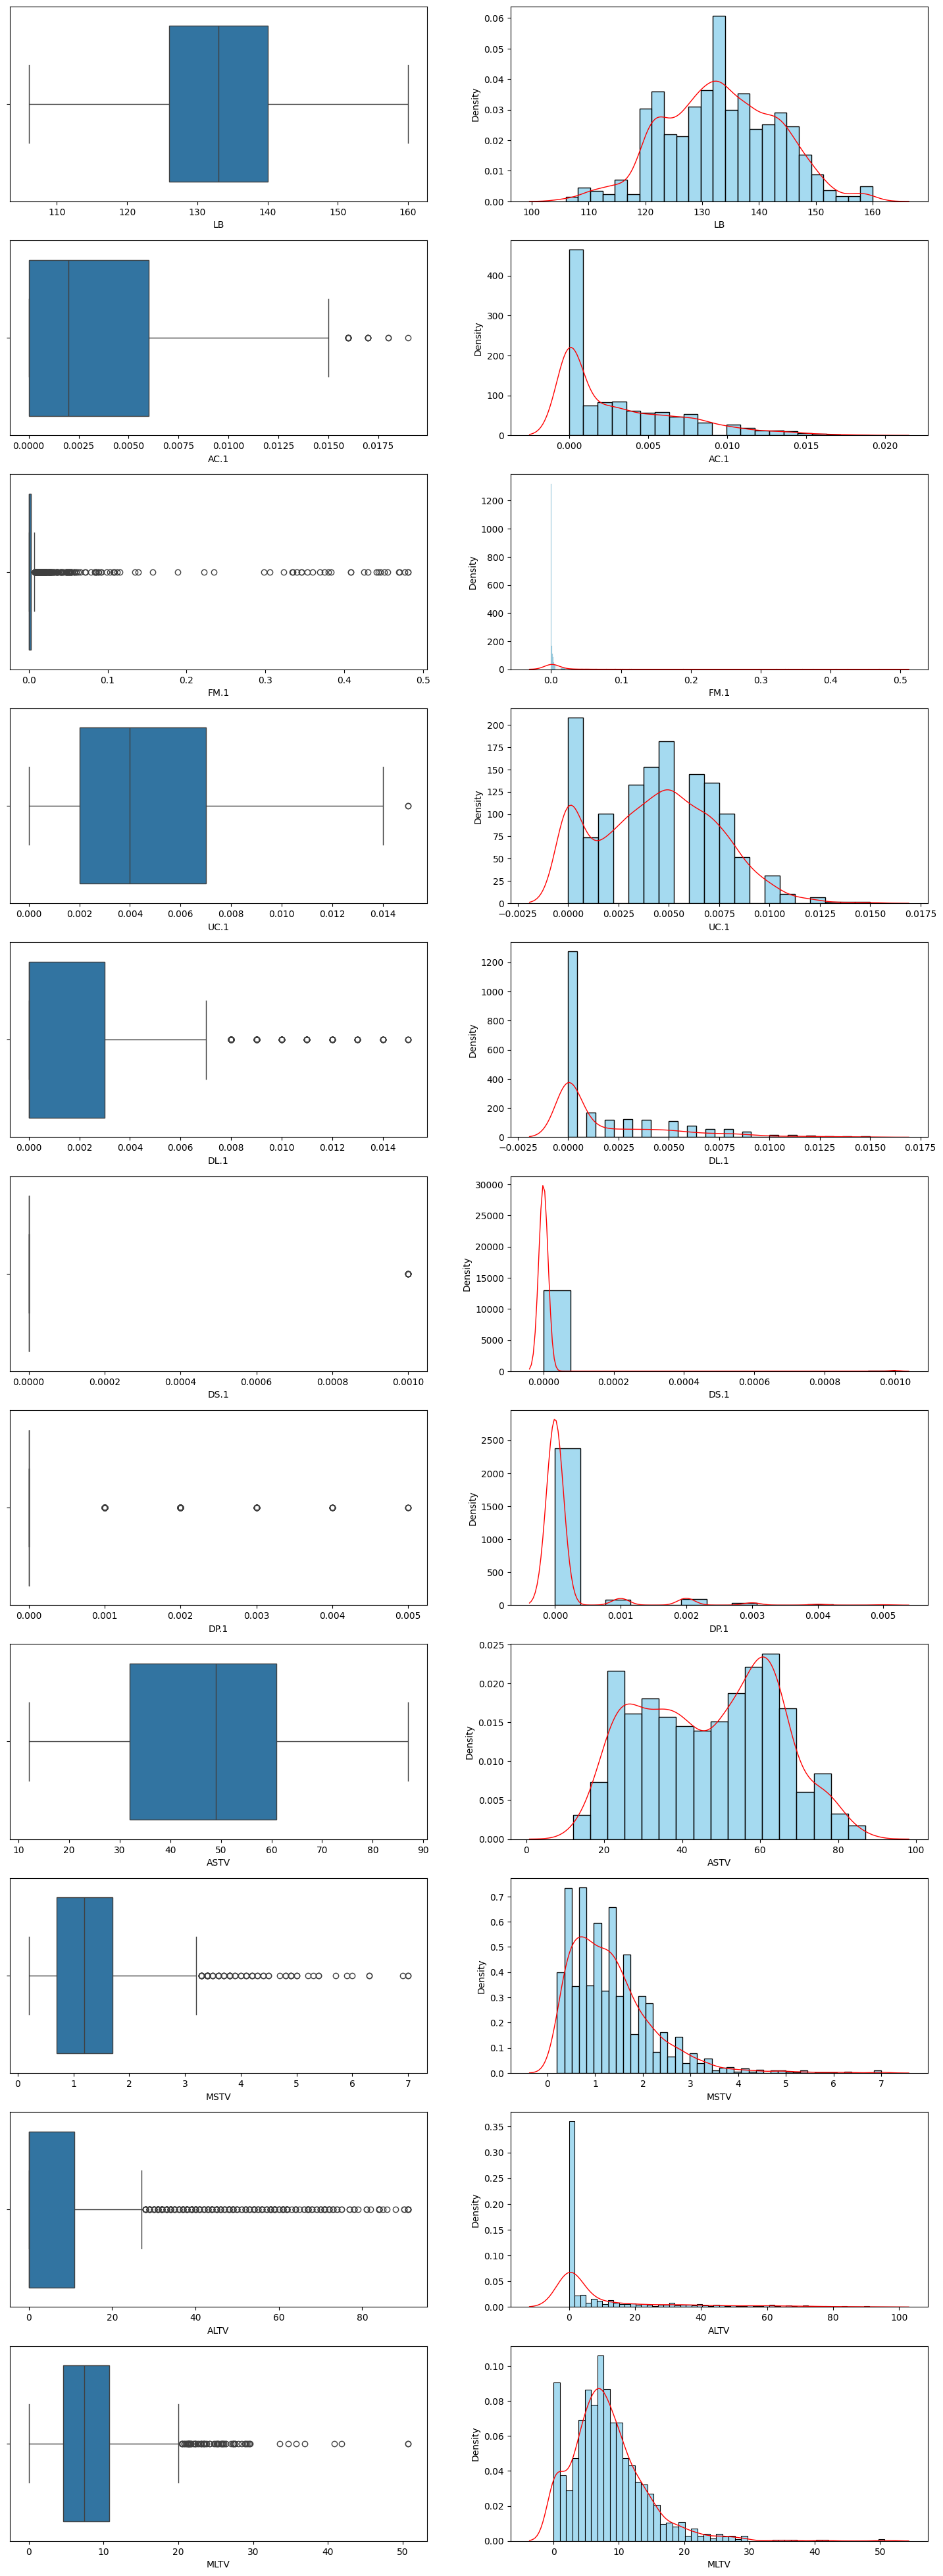

In [15]:
#Explore data for these parameters:
multi = pd.DataFrame(data[["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV","MSTV","ALTV","MLTV"]])
f, axes = plt.subplots(11,2, figsize = (18,50))

count = 0
for var in multi:
    sb.boxplot(data = multi[var], orient = 'h', ax = axes[count,0])
    sb.histplot(data = multi[var], stat='density', color='skyblue', kde=False, ax =axes[count,1])
    sb.kdeplot(data = multi[var], color='red', linewidth=1, ax =axes[count,1])
    count += 1
plt.show()


## Categorical histogram ##

Now we look at how the data will behave when we try to divide the data into 3 parts for each NSP

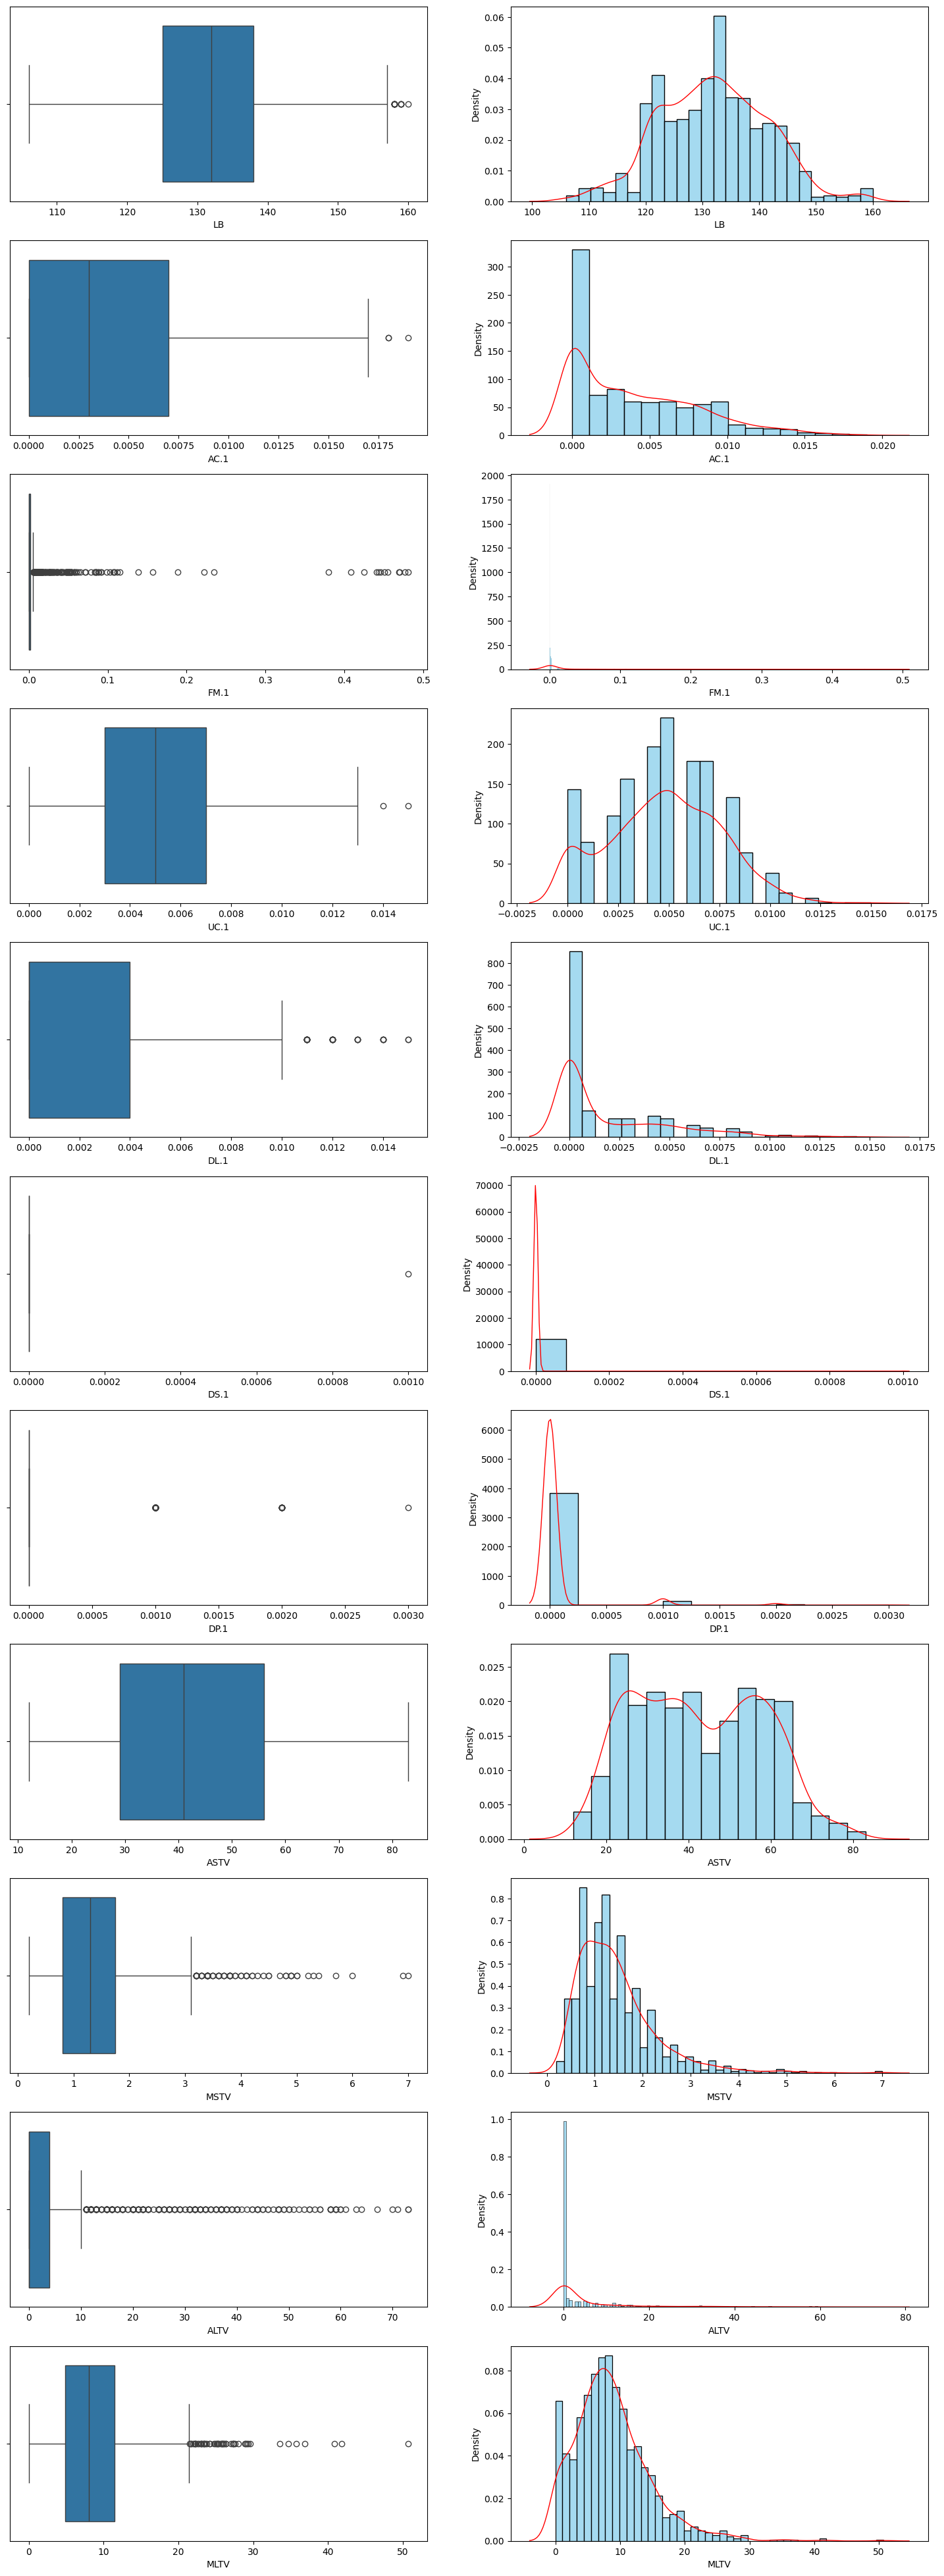

In [17]:
nsp_1 = data[data["NSP"] == 1]
nsp_2 = data[data["NSP"] == 2]
nsp_3 = data[data["NSP"] == 3]
#For NSP = 1
multi = pd.DataFrame(nsp_1[["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV","MSTV","ALTV","MLTV"]])
f, axes = plt.subplots(11,2, figsize = (18,50))

count = 0
for var in multi:
    sb.boxplot(data = multi[var], orient = 'h', ax = axes[count,0])
    sb.histplot(data = multi[var], stat='density', color='skyblue', kde=False, ax =axes[count,1])
    sb.kdeplot(data = multi[var], color='red', linewidth=1, ax =axes[count,1])
    count += 1
plt.show()


C:\Users\phamt\AppData\Local\Temp\ipykernel_13064\2820562366.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data = multi[var], color='red', linewidth=1, ax =axes[count,1])


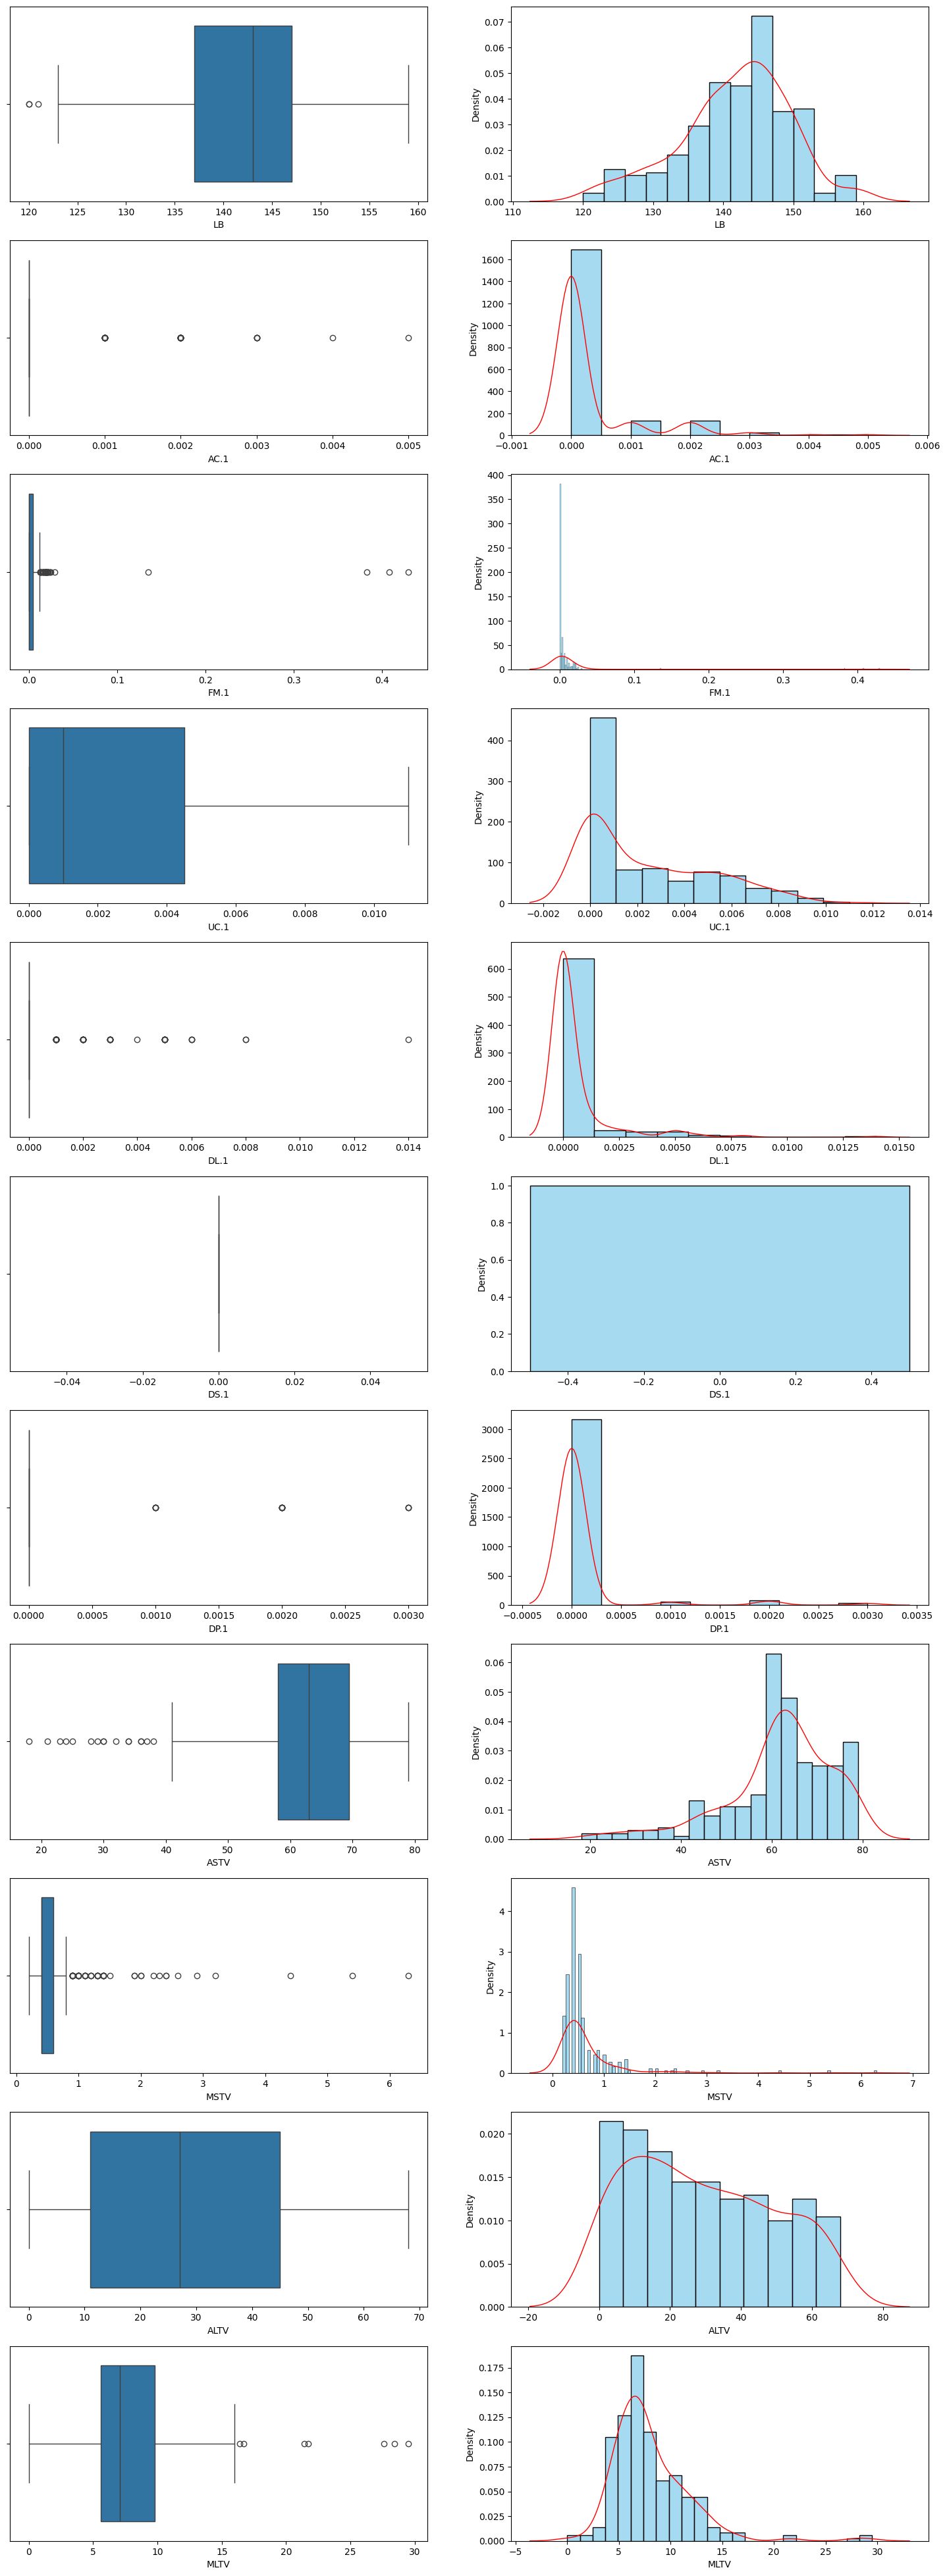

In [18]:
#For NSP = 2
multi = pd.DataFrame(nsp_2[["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV","MSTV","ALTV","MLTV"]])
f, axes = plt.subplots(11,2, figsize = (18,50))

count = 0
for var in multi:
    sb.boxplot(data = multi[var], orient = 'h', ax = axes[count,0])
    sb.histplot(data = multi[var], stat='density', color='skyblue', kde=False, ax =axes[count,1])
    sb.kdeplot(data = multi[var], color='red', linewidth=1, ax =axes[count,1])
    count += 1
plt.show()

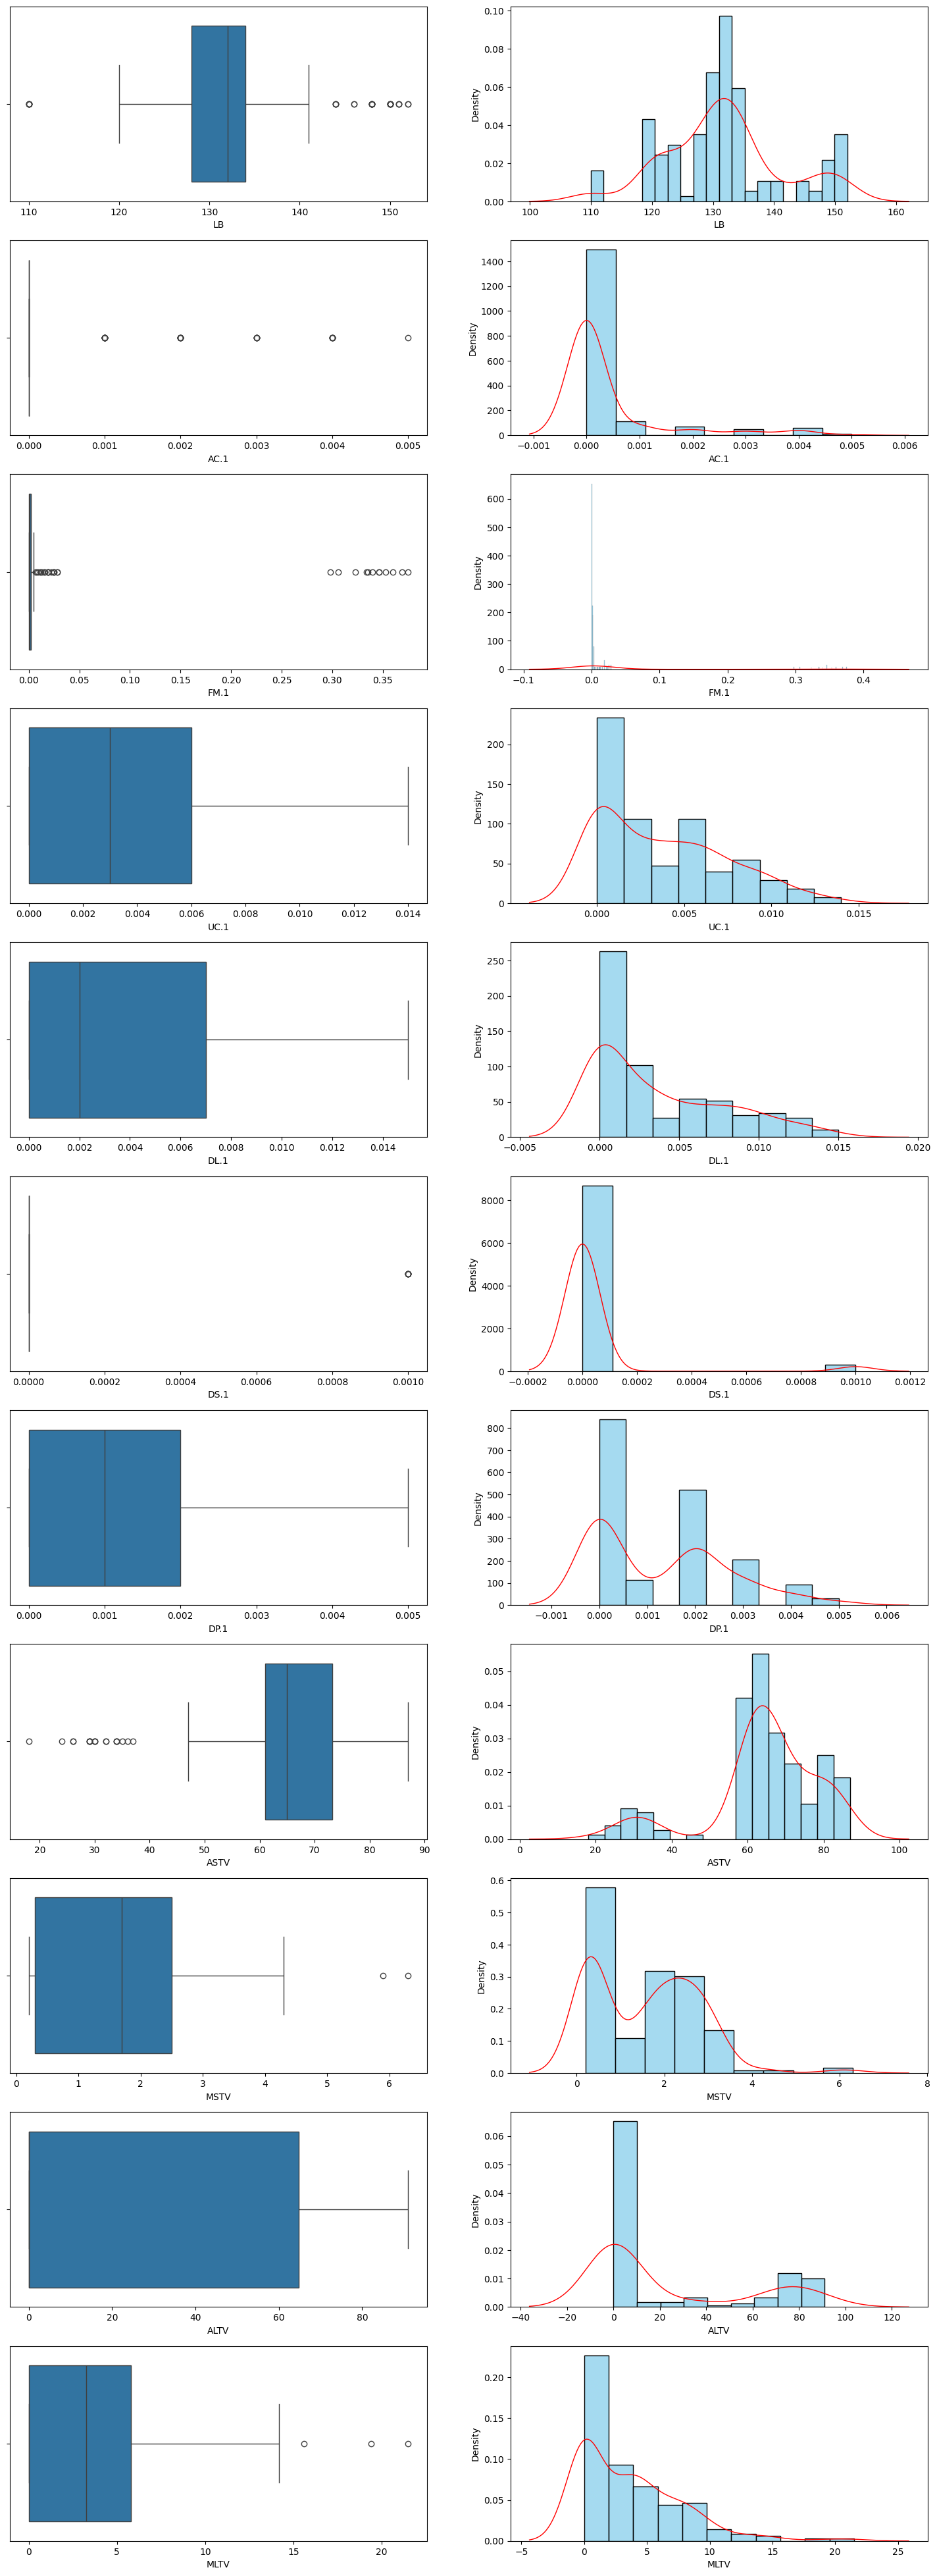

In [19]:
#For NSP = 3
multi = pd.DataFrame(nsp_3[["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV","MSTV","ALTV","MLTV"]])
f, axes = plt.subplots(11,2, figsize = (18,50))

count = 0
for var in multi:
    sb.boxplot(data = multi[var], orient = 'h', ax = axes[count,0])
    sb.histplot(data = multi[var], stat='density', color='skyblue', kde=False, ax =axes[count,1])
    sb.kdeplot(data = multi[var], color='red', linewidth=1, ax =axes[count,1])
    count += 1
plt.show()

## DATA CLEANING ##


In [21]:
#Remove all NaN values:
data_cleaned = data.drop(["Unnamed: 9", "Unnamed: 42", "Unnamed: 44", "Unnamed: 31" ], axis = 1).dropna(how = 'any')
data_cleaned_test_1 =  data_cleaned.drop(["b", "e", "A", "B", "C", "D", "E", "AD", "DE", "LD", "FS", "SUSP", "CLASS"], axis = 1)
data_cleaned_test_1

,AC,FM,UC,DL,DS,DP,DR,LB,AC.1,FM.1,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.000,0.000,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,0.006,0.000,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,0.003,0.000,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,0.003,0.000,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,0.007,0.000,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.0,0.0,6.0,0.0,0.0,0.0,0.0,140.0,0.000,0.000,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,0.001,0.000,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,0.001,0.000,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,0.001,0.000,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Implementing algorithm ##

In [23]:
X_ctg = data_cleaned_test_1.drop('NSP', axis = 1)
y_ctg = data_cleaned_test_1['NSP']
y_ctg

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2126, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  balanced_accuracy_score
from sklearn.naive_bayes import GaussianNB

In [25]:
#Split the train-test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X_ctg, y_ctg,random_state=1, test_size=0.2,)

## Baseline classification: Gaussian naive Bayes ##

In [28]:
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)

In [29]:
from sklearn.metrics import accuracy_score
balanced_acc = balanced_accuracy_score(ytest, y_model)
acc = accuracy_score(ytest, y_model)
print("Accuracy: ", acc) 
print("Balanced accuracy: ", balanced_acc)

Accuracy:  0.7746478873239436
Balanced accuracy:  0.7415305846264886


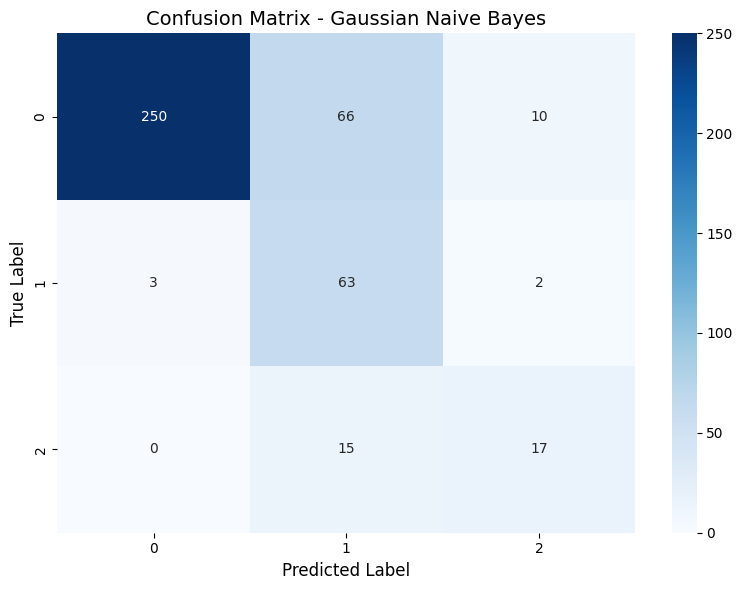

Confusion Matrix:
[[250  66  10]
 [  3  63   2]
 [  0  15  17]]


In [30]:
# Create confusion matrix
cm = confusion_matrix(ytest, y_model)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            cbar=True)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Gaussian Naive Bayes', fontsize=14)
plt.tight_layout()
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)

## Decision tree ##

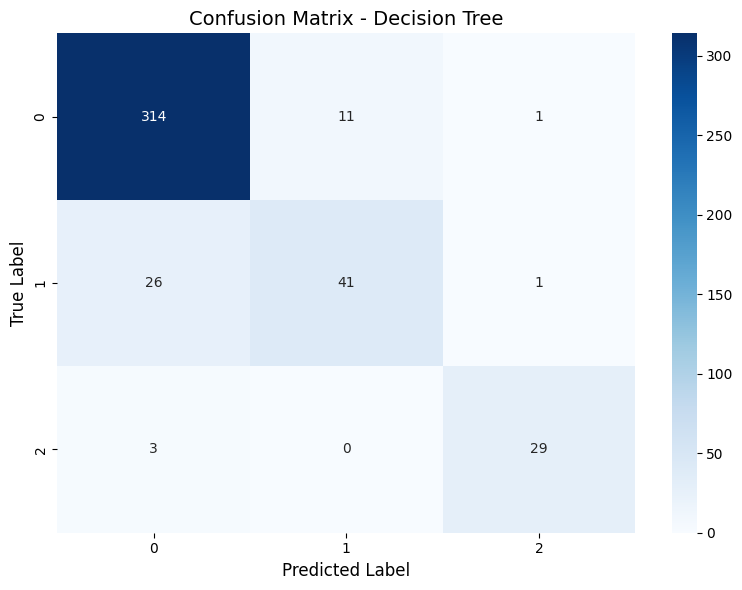

Confusion Matrix:
[[314  11   1]
 [ 26  41   1]
 [  3   0  29]]


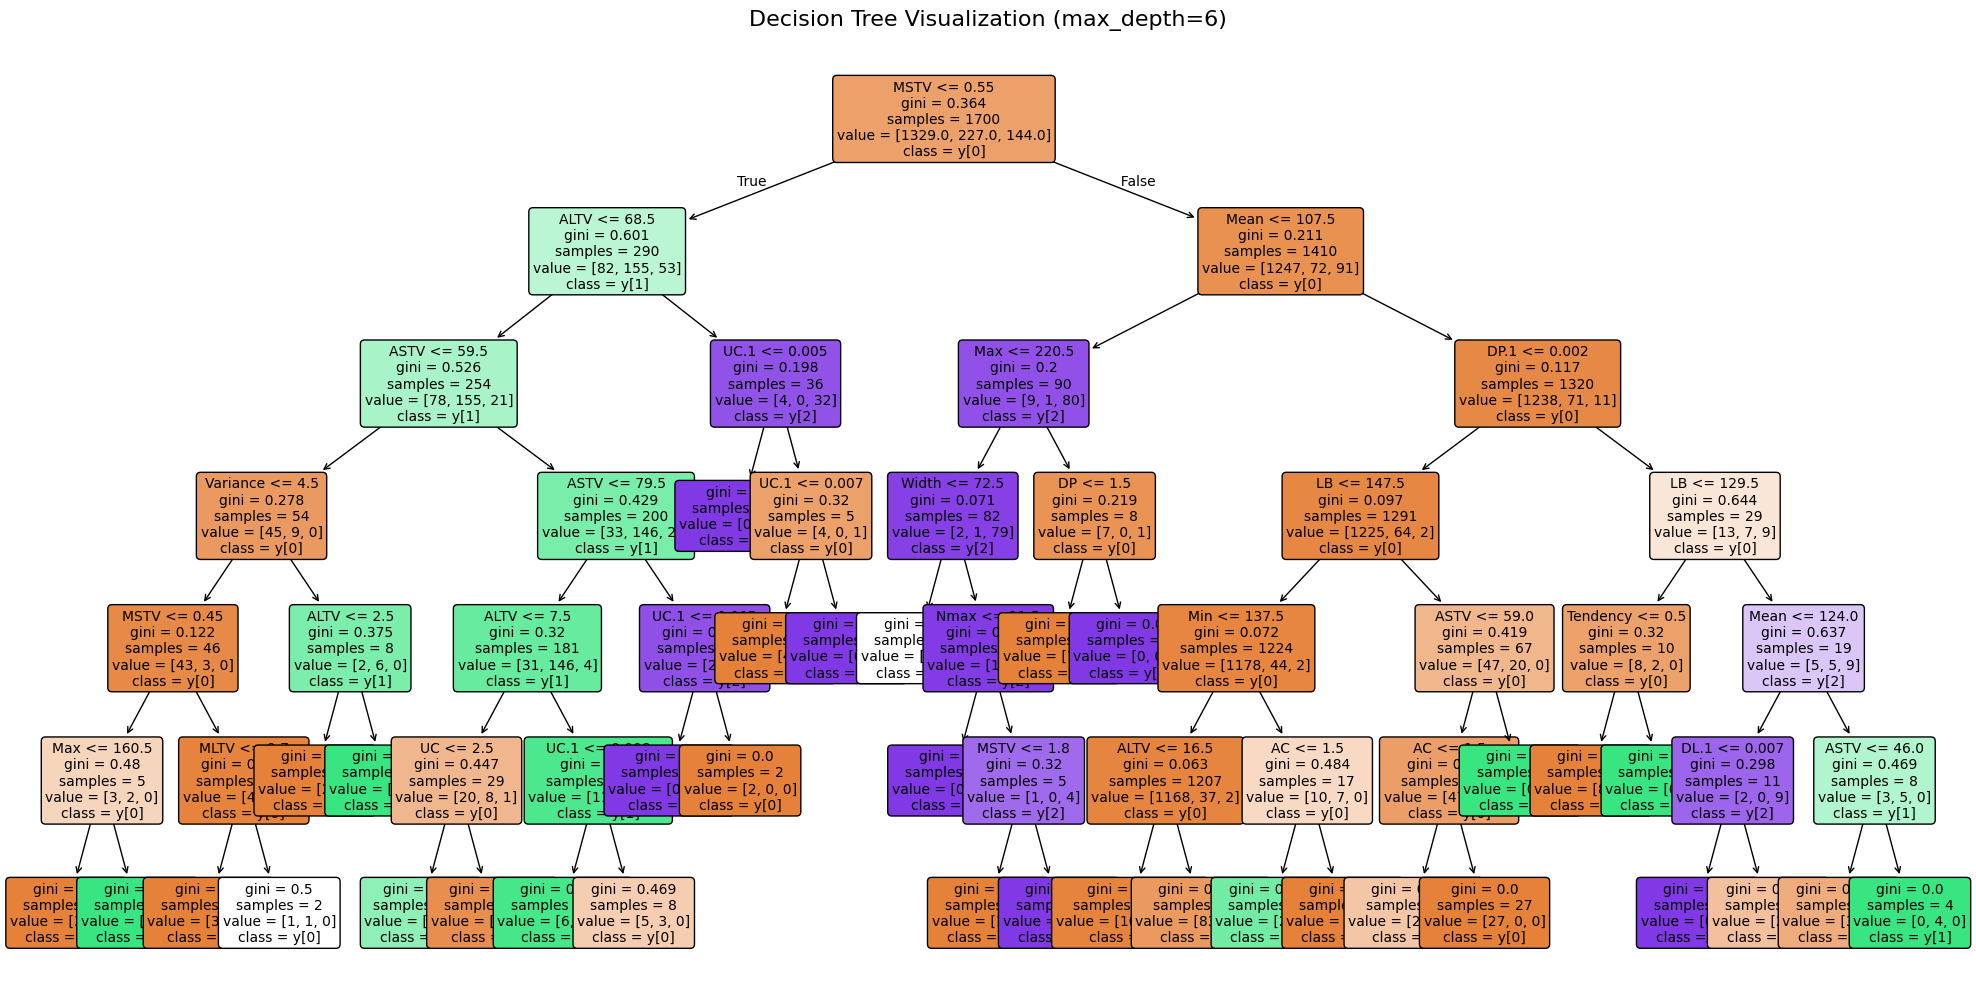

In [57]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
dectree = DecisionTreeClassifier(max_depth = 6)
dectree.fit(Xtrain, ytrain)
y_model = dectree.predict(Xtest)

# Create confusion matrix
cm = confusion_matrix(ytest, y_model)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            cbar=True)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Decision Tree', fontsize=14)
plt.tight_layout()
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)


plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dectree, 
          filled=True,           # Color nodes by class
          feature_names=Xtrain.columns if hasattr(Xtrain, 'columns') else None,  # Feature names if available
          class_names=True,      # Show class names
          rounded=True,          # Rounded boxes
          fontsize=10)

plt.title('Decision Tree Visualization (max_depth=6)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [59]:
balanced_acc = balanced_accuracy_score(ytest, y_model)
acc = accuracy_score(ytest, y_model)
print("Accuracy: ", acc) 
print("Balanced accuracy: ", balanced_acc)

Accuracy:  0.9014084507042254
Balanced accuracy:  0.8241271201732226


## Random forest ##


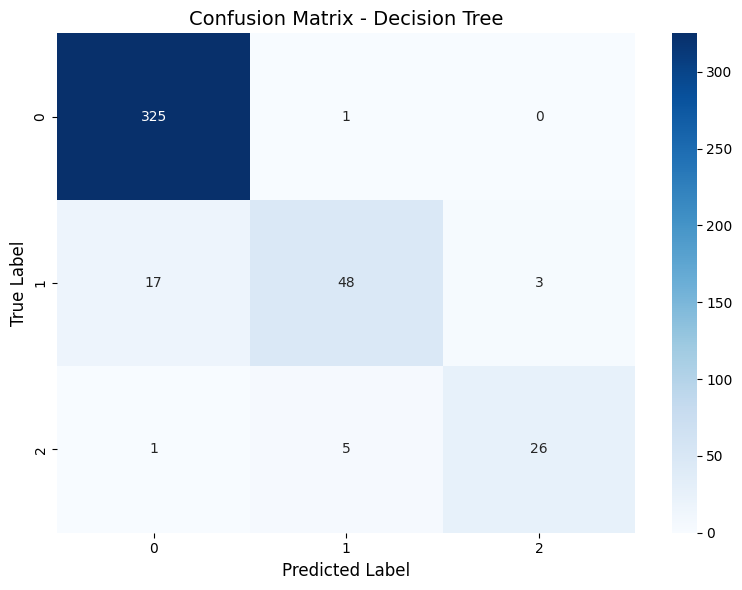

Confusion Matrix:
[[325   1   0]
 [ 17  48   3]
 [  1   5  26]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

# Create confusion matrix
cm = confusion_matrix(ytest, y_model)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            cbar=True)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Decision Tree', fontsize=14)
plt.tight_layout()
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)



In [36]:
balanced_acc = balanced_accuracy_score(ytest, y_model)
acc = accuracy_score(ytest, y_model)
print("Accuracy: ", acc) 
print("Balanced accuracy: ", balanced_acc)

Accuracy:  0.9366197183098591
Balanced accuracy:  0.8384382894261999
